In [72]:
import numpy as np
import pandas as pd
import cv2
import os
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = os.path.join("../data/")
targets = os.listdir(DATA_PATH)

## We have targets in data folder

 - Bike --> .bmp
 - Cars --> .bmp
 - Cats --> .jpg
 - Dogs --> .jpg
 - Flowers --> .png
 - Horses --> .jpg
 - Humans --> .jpg

## Method 1
 - Create a data frame with labels and data_paths
 - Preprocess the data by reading the data frame
 - Store the Normalized values in an array

In [51]:
def create_df(DATA_PATH):
    targets = os.listdir(DATA_PATH)
    X,y = [],[]
    for target in targets:
        for val in os.listdir(os.path.join(DATA_PATH,target)):
            X.append(os.path.join(DATA_PATH,target,val))
            y.append(target)
    df = pd.DataFrame(columns=['img_path','target'])
    df['img_path'] = X
    df['target'] = y
    return df

In [52]:
df = create_df(DATA_PATH)

In [54]:
df.shape()

,img_path,target
0,../data/dogs/dog.167.jpg,dogs
1,../data/dogs/dog.173.jpg,dogs
2,../data/dogs/dog.36.jpg,dogs
3,../data/dogs/dog.22.jpg,dogs
4,../data/dogs/dog.198.jpg,dogs


In [55]:
df[df['target'] == 'bike']

,img_path,target
404,../data/bike/bike_312.bmp,bike
405,../data/bike/bike_306.bmp,bike
406,../data/bike/bike_138.bmp,bike
407,../data/bike/bike_110.bmp,bike
408,../data/bike/bike_104.bmp,bike
...,...,...
764,../data/bike/bike_109.bmp,bike
765,../data/bike/bike_121.bmp,bike
766,../data/bike/bike_135.bmp,bike
767,../data/bike/bike_323.bmp,bike


In [82]:
img = Image.open(df['img_path'][0])

In [84]:
img= cv2.imread(df['img_path'][0])

In [85]:
img.shape

(359, 480, 3)

In [65]:

img1.shape

(480, 640, 3)

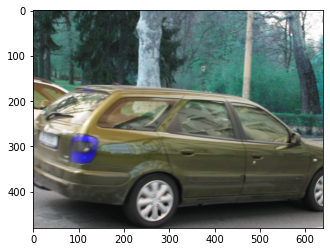

In [75]:
plt.imshow(img1)

In [66]:
img

array([[[ 2,  2,  2],
        [ 5,  2,  7],
        [ 5,  3,  8],
        ...,
        [ 2,  4,  5],
        [ 4,  6,  8],
        [ 4,  5,  6]],

       [[ 7,  2,  2],
        [ 3,  2,  4],
        [ 2,  1,  7],
        ...,
        [ 8,  4,  8],
        [ 6,  5,  5],
        [ 2,  6,  5]],

       [[ 4,  2,  5],
        [ 1,  3,  4],
        [ 0,  3,  4],
        ...,
        [ 5,  5, 10],
        [ 1,  5,  8],
        [ 0,  6,  5]],

       ...,

       [[14, 30, 32],
        [19, 33, 37],
        [14, 29, 28],
        ...,
        [ 1, 20, 26],
        [ 2, 22, 26],
        [ 6, 23, 27]],

       [[13, 31, 35],
        [10, 24, 26],
        [ 9, 22, 21],
        ...,
        [ 2, 20, 22],
        [ 5, 24, 21],
        [ 9, 24, 25]],

       [[ 8, 27, 30],
        [ 5, 18, 16],
        [ 7, 14, 16],
        ...,
        [ 1, 15, 14],
        [ 7, 21, 19],
        [10, 25, 22]]], dtype=uint8)

In [67]:
img1

array([[[ 85, 106, 107],
        [ 80, 100, 101],
        [ 74,  93,  96],
        ...,
        [253, 255, 255],
        [251, 253, 253],
        [252, 254, 254]],

       [[116, 140, 140],
        [109, 130, 131],
        [ 90, 111, 113],
        ...,
        [255, 253, 253],
        [255, 254, 254],
        [255, 255, 255]],

       [[134, 166, 165],
        [125, 156, 155],
        [102, 128, 128],
        ...,
        [255, 253, 254],
        [255, 255, 255],
        [255, 254, 254]],

       ...,

       [[157, 152, 153],
        [156, 151, 152],
        [156, 151, 152],
        ...,
        [192, 192, 192],
        [198, 198, 198],
        [204, 204, 204]],

       [[157, 152, 153],
        [158, 153, 154],
        [158, 153, 154],
        ...,
        [223, 225, 225],
        [225, 227, 227],
        [227, 229, 229]],

       [[156, 151, 152],
        [158, 153, 154],
        [160, 155, 156],
        ...,
        [232, 234, 234],
        [233, 235, 235],
        [232, 234, 234]]

In [76]:
X_norm = []
for i in X:
    X_norm.append(cv2.imread(i)/255)

In [79]:
len(X_norm)

1803

In [97]:
X_norm[1].shape

(333, 500, 3)

In [91]:
df['shape'] = np.zeros((df.shape[0]))

In [101]:

df['shape'] = [X_norm[i].shape for i in range(len(X_norm))]

In [102]:
df

,img_path,target,shape
0,../data/dogs/dog.167.jpg,dogs,"(359, 480, 3)"
1,../data/dogs/dog.173.jpg,dogs,"(333, 500, 3)"
2,../data/dogs/dog.36.jpg,dogs,"(240, 319, 3)"
3,../data/dogs/dog.22.jpg,dogs,"(371, 499, 3)"
4,../data/dogs/dog.198.jpg,dogs,"(375, 499, 3)"
...,...,...,...
1798,../data/human/rider-116.jpg,human,"(276, 182, 3)"
1799,../data/human/rider-102.jpg,human,"(225, 225, 3)"
1800,../data/human/rider-20.jpg,human,"(221, 119, 3)"
1801,../data/human/rider-34.jpg,human,"(232, 162, 3)"


In [106]:
df[df['shape'] == min(df['shape'])]

,img_path,target,shape
380,../data/cats/cat.183.jpg,cats,"(89, 105, 3)"


In [ ]:
cv2.resize()

In [107]:
img_small = cv2.imread(df['img_path'][380])

In [115]:
i_r_s = cv2.resize(img_small,(224,224))

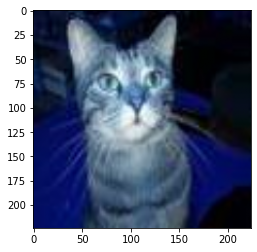

In [123]:
plt.imshow(i_r_s/255.0)

In [117]:
img1 = cv2.resize(img1,(224,224))

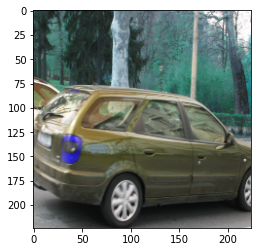

In [122]:
plt.imshow(img1/255)

In [119]:
img1/255

array([[[0.38039216, 0.4627451 , 0.4627451 ],
        [0.2627451 , 0.32156863, 0.34117647],
        [0.21568627, 0.25882353, 0.2745098 ],
        ...,
        [0.99215686, 0.99607843, 0.99607843],
        [0.99215686, 0.99607843, 0.99607843],
        [0.99215686, 0.99215686, 0.99215686]],

       [[0.46666667, 0.6       , 0.59215686],
        [0.25098039, 0.3372549 , 0.34509804],
        [0.21176471, 0.25882353, 0.2745098 ],
        ...,
        [0.98823529, 0.99607843, 0.99607843],
        [0.99215686, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.45098039, 0.58039216, 0.57647059],
        [0.25098039, 0.33333333, 0.3372549 ],
        [0.19607843, 0.25098039, 0.25882353],
        ...,
        [0.90196078, 0.89803922, 0.89803922],
        [0.96862745, 0.97647059, 0.97647059],
        [0.99607843, 0.98823529, 0.98823529]],

       ...,

       [[0.62352941, 0.61568627, 0.61568627],
        [0.6       , 0.58431373, 0.58823529],
        [0.63137255, 0

In [124]:
X_n = [cv2.resize(cv2.imread(i),(224,224))/255.0 for i in df['img_path']]

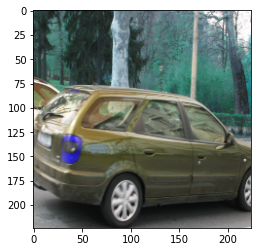

In [137]:
plt.imshow(X_n[1200])

In [134]:
X_n[1230].shape

(224, 224, 3)

In [138]:
df['target'][1200]

'cars'